# BIOS470/570 Lecture 3

## Last time we covered:
* ### other builtin python types for storing collections of objects
* ### mutable vs immutable
* ### copy vs view
* ### basic conditional and loops
* ### importing packages into the workspace

## Today we will cover:
* ### Numpy arrays and numpy indexing
* ### Starting plots with matplotlib

## Numpy arrays

### Start by importing numpy using the standard convention

In [3]:
import numpy as np

### The numpy array function can be used to manually create ndarrays. 
### Note that unlike lists, numpy arrays also have data types
### you can see the data type with the .dtype property. 

In [145]:
arr1d = np.array([1, 2, 3, 4, 5])
print(arr1d)
print(type(arr1d)) # get the type of this numpy array
print(arr1d.dtype) # this shows the type of data inside the arrays

[1 2 3 4 5]
<class 'numpy.ndarray'>
int64


### Numpy arrays can only have one data type. Let's see what happens when we try to add a float to our array. There is an np.append function for this
### Note that unlike the .append method of a list, this does not modify the original array, but makes a copy

In [146]:
arr1d_2 = np.append(arr1d,3.3)
print(arr1d_2) #see what the array looks like now.
print(type(arr1d_2)) # type is still ndarray
print(arr1d_2.dtype) #But dtype is different

[1.  2.  3.  4.  5.  3.3]
<class 'numpy.ndarray'>
float64


### What happens if we try to add a string?

In [13]:
arr1d_with_str = np.append(arr1d_2,"test_str")

In [14]:
print(arr1d_with_str)
print(arr1d_with_str.dtype)

['1.0' '2.0' '3.0' '4.0' '5.0' '3.3' 'test_str']
<U32


### The fact that numpy arrays have a consistent data type allows them to perform mathematical operations very different from 
### standard lists. Let's compare:

In [11]:
list1 = [1, 2, 3, 4, 5]
numpy1 = np.array(list1) # we can make an ndarray from a list
print(list1+list1)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [12]:
print(numpy1+numpy1)

[ 2  4  6  8 10]


### Note if we try to perform numpy addition with dtypes that are not numeric, we get an error:

In [17]:
arr1d_with_str+arr1d_with_str

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> None

### We can define 2d arrays: with the same function

In [19]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) #create a 2d array
print(arr2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Arithmetic also works with 2d arrays

In [22]:
print(arr2d+arr2d)
print(arr2d*arr2d)
print(3*arr2d)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]]


### Aside if you are used to MATLAB, this multiplication is different, because in MATLAB, it would a matrix multiplication, not element-wise.
### numpy has a built in function for matrix multiplications:

In [24]:
np.matmul(arr2d,arr2d)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

### The append function works with 2d arrays but there are multiple ways you can append. 
### Specify the axis to determine which way

In [28]:
print(np.append(arr2d,arr2d,axis=0))

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


In [29]:
print(np.append(arr2d,arr2d,axis=1))

[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]


### Numpy contains many fucntions to put arrays together e.g. hstack, vstack, concatenate, 

In [67]:
print(np.hstack((arr2d,arr2d)))

[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]


In [68]:
print(np.vstack((arr2d,arr2d)))

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


In [72]:
print(np.concatenate((arr2d,arr2d),axis = 0))

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


In [73]:
print(np.concatenate((arr2d,arr2d),axis = 1))

[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]


### There are many other functions that can work along multiple axes. For example, statisical operations.
### Note that statistical operations on a 2d array produce a 1d array:

In [75]:
np.mean(arr2d,axis=0) # averages the rows together

array([4., 5., 6.])

In [76]:
np.mean(arr2d,axis=1) # averages the columns together

array([2., 5., 8.])

In [80]:
np.std(arr2d,axis=1) #standard deviation

array([0.81649658, 0.81649658, 0.81649658])

np.max(arr2d,axis = 0)

In [82]:
np.max(arr2d,axis = 1)

array([3, 6, 9])

## Indexing in numpy. 

### The same slicing as for lists works for numpy arrays

In [93]:
arr1d = np.hstack((arr1d,arr1d+5)) # make a longer array
arr1d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [97]:
arr1d[0:2]

array([1, 2])

In [98]:
arr1d[0:-1]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
arr1d[0::2]

array([1, 3, 5, 7, 9])

### Numpy arrays can also use binary indexes:

In [100]:
ind1 = [True, True, False, False, True,False, False, True,False, True]
arr1d[ind1]

array([ 1,  2,  5,  8, 10])

### This is useful for applying filters to your data because you can create binary indexes from the data

In [108]:
ind_numpy = arr1d > 5
ind_numpy

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [110]:
ind_numpy.dtype

dtype('bool')

In [111]:
arr1d[ind_numpy]

array([ 6,  7,  8,  9, 10])

### You can filter one array based on the data in another. For example, let's say you have some data that falls into two groups "A" and "B", one array has the data, the other labels for the groups:

In [120]:
data = np.random.rand(10)
print(data)

[0.90289879 0.18206538 0.45449899 0.32813711 0.54179068 0.09976623
 0.80415822 0.47264555 0.00515521 0.55067822]


In [121]:
groups = np.array(["A", "B","A","A", "B","B","A","A", "B","A"])
a_avg = data[groups == "A"].mean()
print(a_avg)

0.5855028157329284


### Applying multiple filters with logical operations:

In [142]:
(groups != "A") | (data > 0.6)

array([ True,  True, False, False,  True,  True,  True, False,  True,
       False])

In [143]:
((groups != "A") | (data > 0.6)).any()

True

In [144]:
((groups != "A") | (data > 0.6)).all()

False

In [137]:
data[ (groups == "A") | (data > 0.5)]

array([0.90289879, 0.45449899, 0.32813711, 0.54179068, 0.80415822,
       0.47264555, 0.55067822])

In [138]:
data[ (groups == "A") & (data > 0.5)]

array([0.90289879, 0.80415822, 0.55067822])

### indexing in multiple dimensions:

In [123]:
arr2d 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [124]:
arr2d[1,1] 

5

In [127]:
arr2d[0,:] #first row

array([1, 2, 3])

In [152]:
arr2d[0] #first row, can leave off : if you want the first dimension

array([1, 2, 3])

In [129]:
arr2d[:,0] #first column

array([1, 4, 7])

In [131]:
arr2d[:,1:] #columns for 2 onward

array([[2, 3],
       [5, 6],
       [8, 9]])

In [150]:
arr2d[-1,:] #last row

array([7, 8, 9])

### Note that returning a slice of an array does not make a copy:

In [153]:
arr2d_part = arr2d[0:-1,:]
arr2d_part[0,0] = 1000
print(arr2d_part)

[[1000    2    3]
 [   4    5    6]]


In [154]:
print(arr2d)

[[1000    2    3]
 [   4    5    6]
 [   7    8    9]]


In [157]:
### same is true of the transpose operation:
arr2d_transpose = arr2d.transpose()
arr2d_transpose[0,0] = -123 
print(arr2d_transpose)

[[-123    4    7]
 [   2    5    8]
 [   3    6    9]]


In [158]:
print(arr2d)

[[-123    2    3]
 [   4    5    6]
 [   7    8    9]]


### If you need a separate array, make a copy

In [163]:
arr2d_slice = arr2d[1:,:].copy()
arr2d_slice[0,0] = 345
print(arr2d_slice)

[[345   5   6]
 [  7   8   9]]


In [164]:
print(arr2d)

[[-123    2    3]
 [   4    5    6]
 [   7    8    9]]


## Making plots with the matplotlib library
### This is the standard convention for import:

In [1]:
import matplotlib.pyplot as plt

In [4]:
x = np.random.rand(100)
y = np.random.rand(100)

### Some simple scatter and line plots

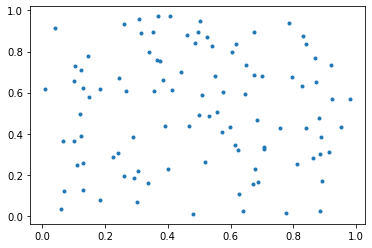

In [5]:
plt.plot(x,y,'.') #simple 2d plot

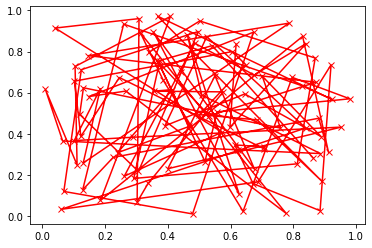

In [6]:
plt.plot(x,y,'rx-') #red x's with lines

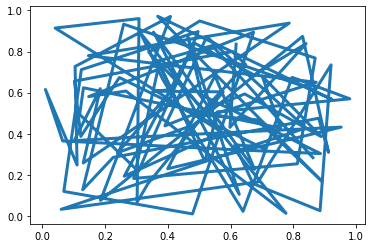

In [7]:
plt.plot(x,y,linewidth = 3) #thicker line

### Add title and axis labels:

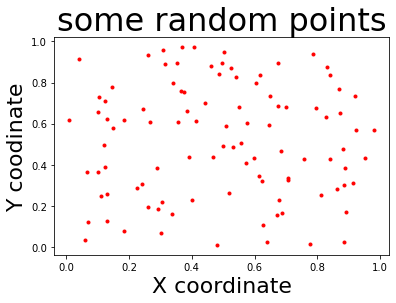

In [26]:
plt.plot(x,y,'r.')
plt.title('some random points', fontsize = 32)
plt.xlabel('X coordinate',fontsize=22)
plt.ylabel('Y coodinate',fontsize = 22)
plt.show()

### make a bigger figure:

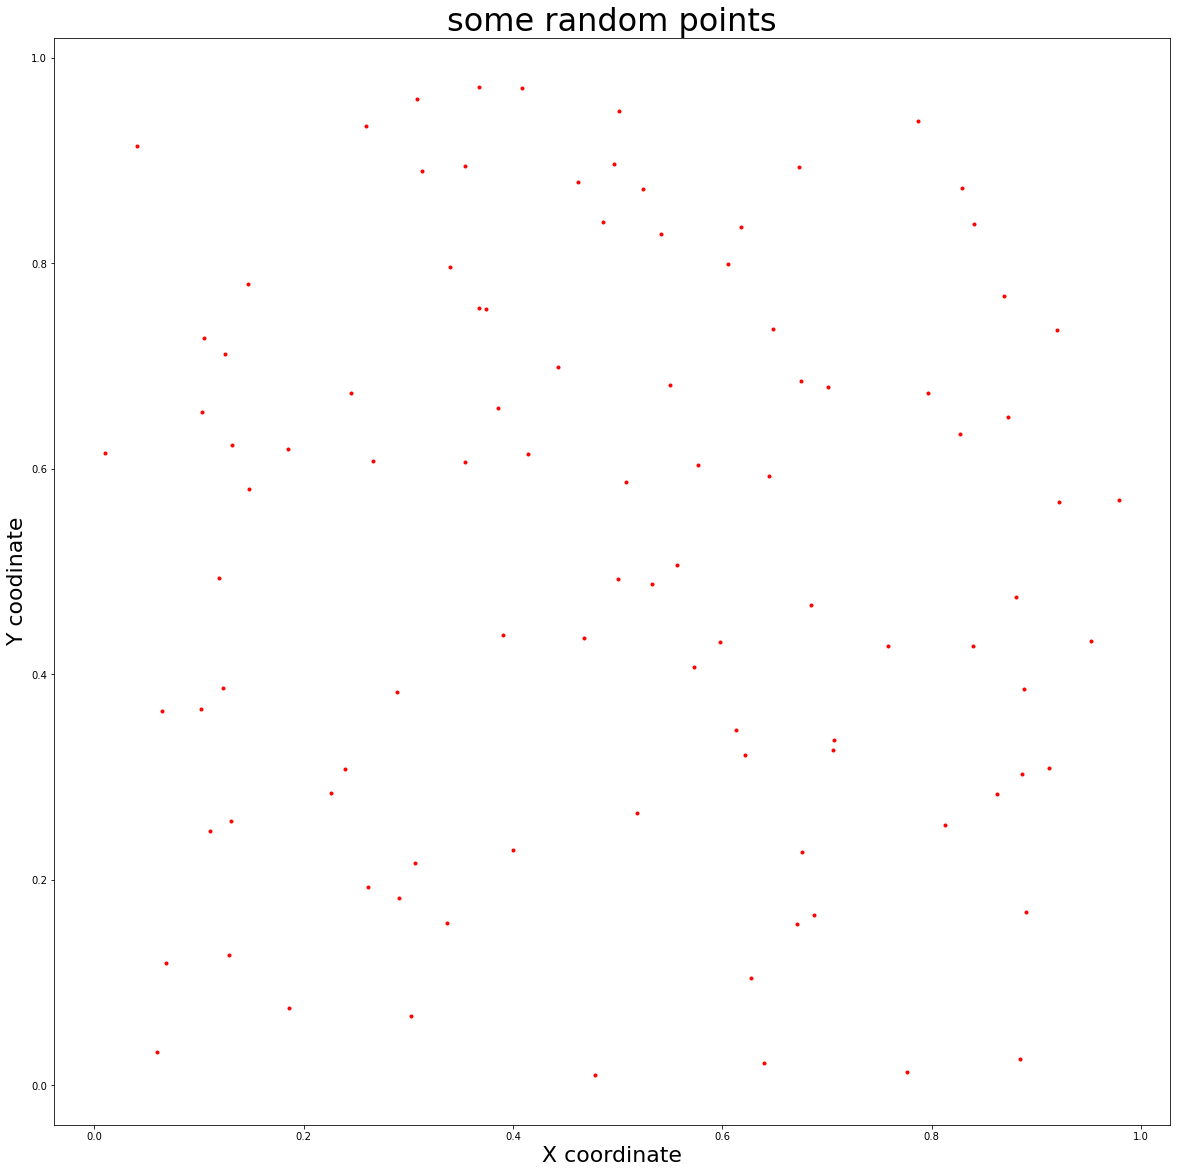

In [28]:
plt.figure(figsize=(20,20))
plt.plot(x,y,'r.')
plt.title('some random points', fontsize = 32)
plt.xlabel('X coordinate',fontsize=22)
plt.ylabel('Y coodinate',fontsize = 22)
plt.show()

### Make a figure with subplots

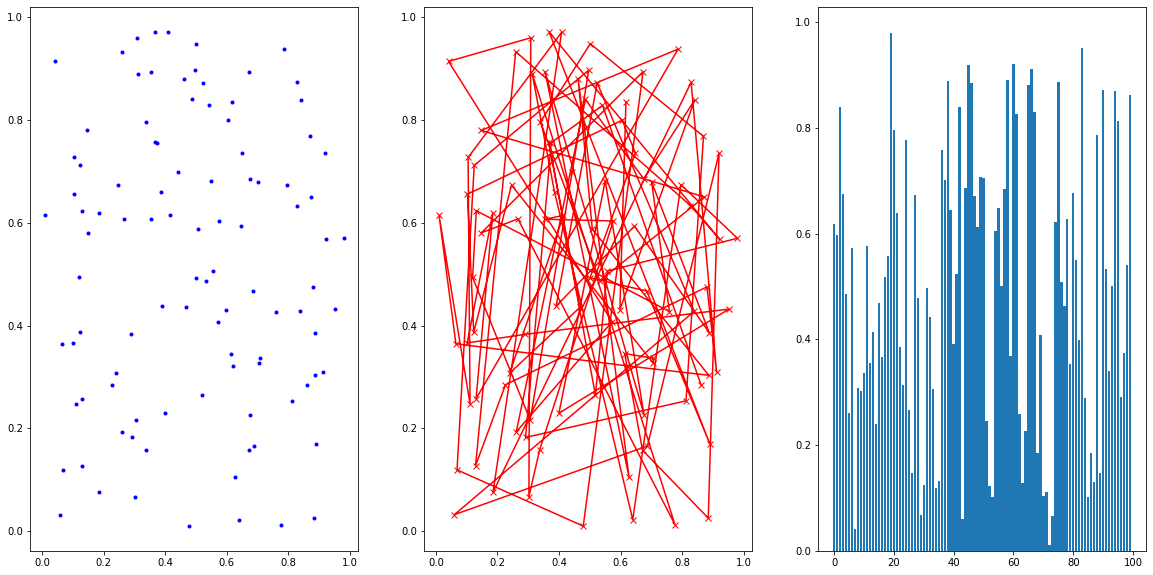

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(x,y,'b.')
plt.subplot(1,3,2)
plt.plot(x,y,'rx-')
plt.subplot(1,3,3)
plt.bar(np.arange(100),x)
plt.show()